# Lab 8 


Many of the examples have been adapted from Data100 and J. Canny's course.

**Required Files**  
The imdb.db files (see instructions below on getting this data).

## Autograder Setup

For this lab, with the exception of Exercise 1, your answers will not be autograded.  
Also, below you will see new code establishing a condition so that you don't have to worry about commenting out lines of code before submitting. 

In [ ]:
import re
import os
if re.search(r'amzn', os.uname().release): 
    GS = True
else: 
    GS = False
GS

False

In [ ]:
if GS==False:
    print("Installing otter:")
    !pip install otter-grader

Installing otter:
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 168 kB 4.9 MB/s 
     |████████████████████████████████| 98 kB 6.8 MB/s 
     |████████████████████████████████| 297 kB 42.4 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 84 kB 2.2 MB/s 


In [ ]:
if GS==False:
    !wget https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab8/lab8.files.zip
    !unzip lab8.files.zip

--2022-10-26 22:08:39--  https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab8/lab8.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797 [application/zip]
Saving to: ‘lab8.files.zip’

lab8.files.zip      100%[===================>]     797  --.-KB/s    in 0s      

2022-10-26 22:08:39 (145 MB/s) - ‘lab8.files.zip’ saved [797/797]

Archive:  lab8.files.zip
   creating: tests/
  inflating: tests/q1.py             
  inflating: tests/.DS_Store         


## Lab Setup

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import getpass
import otter
grader = otter.Notebook()

For this lab, we will be using SQLite to connect to databases. This is a simple, light-way module, there are of course other modules to interact with databases. 

SQLite has a [nice tutorial](https://www.sqlitetutorial.net/) if you want to learn more about database queries and explore additional options. 


In [ ]:
import sqlite3

A couple of things to know about SQLite.  Other database systems such as `MySQL` and `PostgreSQL` use *static typing*, where a column is declared for a specific data type and can only store data of that type. 

SQLite uses *dynamic type system*, where a value stored in a column determines its data type, not the column's data type.  

In [ ]:
# setup connection to new empty db
conn = sqlite3.connect("testdatabase.db")

### Printing out SQL calls and results 

We define a function `print_sql(s)` that given an sql query `s` returns the results of the executing. 

In [ ]:
def print_sql(c, s):
    print('>', s)
    for result in c.execute(s):
        print(result)
    print()

We could also use `pandas` `read_sql` function to read in the results of the query to a dataframe to disply.  *Be careful with running this code as it will create the dataframe - for a query that returns many records this could be memory-intensive*

In [ ]:
def pretty_print_sql(c, s):
    print('>', s)
    df = pd.read_sql(s, c)
    display(df)
    return df

## Example 1: SQL with a Test DB 

Here we will use SQLite connection to a test database.

First, we will create two sample tables to use in the examples.

Create the relational instances in the database.

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/ex1-tables.png" width="350px">



In [ ]:
conn.executescript("""
DROP TABLE IF EXISTS s;
DROP TABLE IF EXISTS t;

CREATE TABLE s(
    m INTEGER PRIMARY KEY, 
    u TEXT
);

INSERT INTO s VALUES 
    (1, 'W'),
    (2, 'X'),
    (3, 'X'),
    (4, 'Y');

CREATE TABLE t(
    n TEXT PRIMARY KEY, 
    v CHAR
);

INSERT INTO t VALUES 
    ('A', 'X'),
    ('B', 'X'),
    ('C', 'Y'),
    ('D', 'Z');
""");

We can use this to look at the tables `s` and `t` in undefined order.

In [ ]:
print_sql(conn, 'SELECT * FROM s;')
print_sql(conn, 'SELECT * FROM t;')

> SELECT * FROM s;
(1, 'W')
(2, 'X')
(3, 'X')
(4, 'Y')

> SELECT * FROM t;
('A', 'X')
('B', 'X')
('C', 'Y')
('D', 'Z')



In [ ]:
pretty_print_sql(conn, 'SELECT * FROM t;')

> SELECT * FROM t;


,n,v
0,A,X
1,B,X
2,C,Y
3,D,Z


,n,v
0,A,X
1,B,X
2,C,Y
3,D,Z


### Cross Join 

Let's know look at performing some of the join operations discussed in class.

First, we will look at the cross join or cross product.

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/cross-join.png" width="600px">

In [ ]:
print_sql(conn, 'SELECT * FROM s, t;')

> SELECT * FROM s, t;
(1, 'W', 'A', 'X')
(1, 'W', 'B', 'X')
(1, 'W', 'C', 'Y')
(1, 'W', 'D', 'Z')
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(2, 'X', 'C', 'Y')
(2, 'X', 'D', 'Z')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(3, 'X', 'C', 'Y')
(3, 'X', 'D', 'Z')
(4, 'Y', 'A', 'X')
(4, 'Y', 'B', 'X')
(4, 'Y', 'C', 'Y')
(4, 'Y', 'D', 'Z')



In [ ]:
# Another way to structure our query
print_sql(conn, """
SELECT *
FROM s CROSS JOIN t;
""")

> 
SELECT *
FROM s CROSS JOIN t;

(1, 'W', 'A', 'X')
(1, 'W', 'B', 'X')
(1, 'W', 'C', 'Y')
(1, 'W', 'D', 'Z')
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(2, 'X', 'C', 'Y')
(2, 'X', 'D', 'Z')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(3, 'X', 'C', 'Y')
(3, 'X', 'D', 'Z')
(4, 'Y', 'A', 'X')
(4, 'Y', 'B', 'X')
(4, 'Y', 'C', 'Y')
(4, 'Y', 'D', 'Z')



### Inner Join 

Next, look at performing an inner join. 

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/inner-join.png" width="600px">

In [ ]:
# Here are three methods for performing and printint out the inner join
print_sql(conn, 'SELECT * FROM s JOIN t ON s.u = t.v;')
print_sql(conn, 'SELECT * FROM s, t WHERE s.u = t.v;')
pretty_print_sql(conn, 'SELECT * FROM s, t WHERE s.u = t.v;')

> SELECT * FROM s JOIN t ON s.u = t.v;
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')

> SELECT * FROM s, t WHERE s.u = t.v;
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')

> SELECT * FROM s, t WHERE s.u = t.v;


,m,u,n,v
0,2,X,A,X
1,2,X,B,X
2,3,X,A,X
3,3,X,B,X
4,4,Y,C,Y


,m,u,n,v
0,2,X,A,X
1,2,X,B,X
2,3,X,A,X
3,3,X,B,X
4,4,Y,C,Y


### Left Outer Join 

Next, let's examine performing a left outer join. 

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/left-outer-join.png" width="600px">

In [ ]:
print_sql(conn, 'SELECT * FROM s LEFT JOIN t ON s.u = t.v')

> SELECT * FROM s LEFT JOIN t ON s.u = t.v
(1, 'W', None, None)
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')



### Other Joins 



In [ ]:
print_sql(conn, 'SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;')
print_sql(conn, 'SELECT s.m, s.u, t.n, t.v FROM s LEFT JOIN t ON s.u = t.v UNION '
          'SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;')

> SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;
(2, 'X', 'A', 'X')
(3, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')
(None, None, 'D', 'Z')

> SELECT s.m, s.u, t.n, t.v FROM s LEFT JOIN t ON s.u = t.v UNION SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;
(None, None, 'D', 'Z')
(1, 'W', None, None)
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')



In [ ]:
# Close down connection to database
conn.close()

## Example 2: IMDB 


Let's look at some large data files!  We will pull some data from IMDB. 


### Database Created 

Here is a summary on how the database was created. 

**Download data**

The data we are interested is available from [IMDB](https://www.imdb.com/interfaces/)

```python 
# From https://www.imdb.com/interfaces/
fetch_and_cache('https://datasets.imdbws.com/title.basics.tsv.gz', 'titles.tsv.gz') 
fetch_and_cache('https://datasets.imdbws.com/name.basics.tsv.gz', 'names.tsv.gz')
```

**Unzip files**

```python 
!gunzip -kf data/titles.tsv.gz
!gunzip -kf data/names.tsv.gz
!ls -lh data
```

**View files** 

If on a Mac, Linux computer or Colab notebook. 

```
!head -n5 data/titles.tsv 
!head -n5 data/names.tsv
```

**Create the Database**

I have done this for you because it is easier using the command line with `sqlite3`.  

* First, removed the `"` that appear in the tab files.  
* Create database using the following commands. 

On a Mac/Linux box with sqlite3 v3.8 or higher, run the following commands at the terminal. 

```
(base) lebrown@lebrown-macbook data$ sqlite3 imdb.db
SQLite version 3.27.2 2019-02-25 16:06:06
Enter ".help" for usage hints.
sqlite> .mode tabs
sqlite> .import titles.tsv titles
sqlite> .import names.tsv names
sqlite> ^D
```


### Download the Database 

The `imdb.db` database is available for you to download on [Kaggle](https://www.kaggle.com/). 

You have already created your Kaggle account and can again use your API to access the data.

#### Method 1: 
Copy and paste the key information (does not upload your key information to the Drive). 

In [ ]:
from getpass import getpass

if GS==False:
    os.environ['KAGGLE_USERNAME'] = getpass("Enter Kaggle Username: ")
    os.environ['KAGGLE_KEY'] = getpass("Enter Kaggle API Key: ")

Enter Kaggle Username: ··········
Enter Kaggle API Key: ··········


#### Method 2 

Load `kaggle.json` to Colab directory (file is destroyed when sevice is disconnected).  This method relys on Google's security for safely storing and protecting your data. 

In [ ]:
# from google.colab import files

# if GS==False:
#     uploaded = files.upload()

In [ ]:
# import json

# if GS==False:
#     with open("kaggle.json") as f:
#         keys = json.load(f)

#     os.environ['KAGGLE_USERNAME'] = keys["username"] # username from the json file
#     os.environ['KAGGLE_KEY'] = keys["key"] # key from the json file

#### Download the Data 

In [ ]:
if GS==False:
    !kaggle datasets download -d lebrown/un5550-imdb # api copied from kaggle

 95% 457M/479M [00:02<00:00, 169MB/s]
100% 479M/479M [00:02<00:00, 172MB/s]


In [ ]:
import zipfile

if GS==False:
     # Will unzip the files so that you can see them..
     with zipfile.ZipFile("un5550-imdb.zip","r") as z:
         z.extractall(".")

You now have the `imdb.db` database available to you.

In [ ]:
if GS==False:
    conn = sqlite3.connect("imdb.db")

## Exercise 1 

Let's look at just the first 10 entries from the `titles` relation. 

Your solution should be of the form: 
```
q1df = pretty_print_sql(<conn>, <query>) 
```

In [ ]:
if GS==False:
    q1df = pretty_print_sql(conn, '''
    SELECT * FROM titles
    LIMIT 10;''') 
else: 
    q1df = 1

> 
    SELECT * FROM titles
    LIMIT 10;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [ ]:
grader.check("q1")

q1 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Exercise 2 

While we know the structure of the tables from IMDB, see how this info is laid out.

That is, show the tables in the database and their structure (i.e., what fields-types they have)

Use the `conn.execute(...)` function rather than the `pretty_print_sql(...)` function.

You answer should look like: 

    CREATE TABLE titles(
      "tconst" TEXT,
      ...

In [ ]:
q2str = ''
for exp in conn.execute('SELECT sql FROM sqlite_master'):
  for value in exp:
    q2str += str(value)
  
print(q2str)

CREATE TABLE titles(
  "tconst" TEXT,
  "titleType" TEXT,
  "primaryTitle" TEXT,
  "originalTitle" TEXT,
  "isAdult" TEXT,
  "startYear" TEXT,
  "endYear" TEXT,
  "runtimeMinutes" TEXT,
  "genres" TEXT
)CREATE TABLE names(
  "nconst" TEXT,
  "primaryName" TEXT,
  "birthYear" TEXT,
  "deathYear" TEXT,
  "primaryProfession" TEXT,
  "knownForTitles" TEXT
)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 3 

Write a query to return the movies where the starting year > 2005.  

Your solution should be of the form: 
```
pretty_print_sql(<conn>, <query>) 
```

Display all fields of the appropriate table. 

Make sure to exclude records that are missing a starting year value (encoded as '\N') 

Limit your query to 10 records.  

In [ ]:
q3df = pretty_print_sql(conn, '''
SELECT * from titles
WHERE startYear > 2005 AND startYear NOT IN ("\\N")
LIMIT 10;''')

> 
SELECT * from titles
WHERE startYear > 2005 AND startYear NOT IN ("\N")
LIMIT 10;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0013620,short,Sol y sombra,Sol y sombra,0,2020,\N,40,"Drama,Short"
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
2,tt0055769,short,La bague du roi Koda,La bague du roi Koda,0,2017,\N,24,Short
3,tt0060366,short,A Embalagem de Vidro,A Embalagem de Vidro,0,2020,\N,11,"Documentary,Short"
4,tt0062336,movie,El Tango del Viudo y Su Espejo Deformante,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,Drama
5,tt0065047,short,The Sun's Gonna Shine,The Sun's Gonna Shine,0,2014,\N,10,"Documentary,Music,Short"
6,tt0065392,movie,Bucharest Memories,Amintiri bucurestene,0,2020,\N,\N,Documentary
7,tt0068943,short,Between Wrocław and Zielona Góra,Miedzy Wroclawiem a Zielona Góra,0,2010,\N,11,"Documentary,Short"
8,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama
9,tt0072306,movie,Toula ou Le génie des eaux *,Toula ou Le génie des eaux *,0,2017,\N,90,Drama


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 4 

Write a query to return fantasy, TV shows starting in 2007 with a 43 minute running time.  

Your solution should be of the form: 
```
pretty_print_sql(<conn>, <query>) 
```

Display all fields of the appropriate table. 

Limit your query to return 10 records. 

In [ ]:
q4df = pretty_print_sql(conn, '''
SELECT * FROM titles
WHERE genres LIKE '%Fantasy%' AND titleType = "tvEpisode" AND startYear = 2007 AND runtimeMinutes = 43
LIMIT 10;''')

> 
SELECT * FROM titles
WHERE genres LIKE '%Fantasy%' AND titleType = "tvEpisode" AND startYear = 2007 AND runtimeMinutes = 43
LIMIT 10;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0863292,tvEpisode,Love Hurts,Love Hurts,0,2007,\N,43,"Drama,Fantasy,Horror"
1,tt0865034,tvEpisode,Blood Price,Blood Price,0,2007,\N,43,"Drama,Fantasy,Horror"
2,tt0865595,tvEpisode,Gifted,Gifted,0,2007,\N,43,"Drama,Fantasy,Horror"
3,tt0885600,tvEpisode,Bad JuJu,Bad JuJu,0,2007,\N,43,"Drama,Fantasy,Horror"
4,tt0891077,tvEpisode,Not in Portland,Not in Portland,0,2007,\N,43,"Adventure,Drama,Fantasy"
5,tt0893453,tvEpisode,Chapter Twelve 'Godsend',Chapter Twelve 'Godsend',0,2007,\N,43,"Drama,Fantasy,Sci-Fi"
6,tt0901193,tvEpisode,Chapter Thirteen 'The Fix',Chapter Thirteen 'The Fix',0,2007,\N,43,"Drama,Fantasy,Sci-Fi"
7,tt0904194,tvEpisode,Stone Cold,Stone Cold,0,2007,\N,43,"Drama,Fantasy,Horror"
8,tt0911175,tvEpisode,Post Partum,Post Partum,0,2007,\N,43,"Drama,Fantasy,Horror"
9,tt0913481,tvEpisode,Heart of Fire,Heart of Fire,0,2007,\N,43,"Drama,Fantasy,Horror"


<!-- END QUESTION -->

## Example 3 -  Add new table for Dramas

Python allows for string substition with the following expression (new in Python 3.6)

In [ ]:
# Python string substitution 
who, where = 'Laura', 'here'
temp = f"{who} is {where}"
temp

'Laura is here'

We will use this to select out information about drama movies. Then, create a new table titled `dramas` that we can use in the following questions. 

In [ ]:
key = 'tconst'
title = 'primaryTitle'
time = 'runtimeMinutes'
year = 'startYear'
adult = 'isAdult'
kind = 'titleType'

select_drama = f'''
    SELECT {key} AS id,
           {title} AS title, 
           CAST({time} AS int) AS time, 
           CAST({year} AS int) AS year
    FROM titles
    WHERE genres LIKE '%Drama%' AND
          {year} > 1900 AND 
          {year} < 2019 AND
          {adult} = '0' AND
          {kind} = 'movie' AND
          time > 60
    '''
conn.executescript(f'''
    DROP TABLE IF EXISTS dramas;
    CREATE TABLE dramas AS {select_drama};
    ''')

Now we can query this table `dramas`

In [ ]:
ex3 = pretty_print_sql(conn, 'SELECT * FROM dramas ORDER BY year DESC LIMIT 10')

> SELECT * FROM dramas ORDER BY year DESC LIMIT 10


,id,title,time,year
0,tt0069049,The Other Side of the Wind,122,2018
1,tt0192528,Heaven & Hell,104,2018
2,tt0276568,To Chase a Million,97,2018
3,tt0328810,My Land,102,2018
4,tt0360556,Fahrenheit 451,100,2018
5,tt0365545,Nappily Ever After,98,2018
6,tt0427543,A Million Little Pieces,113,2018
7,tt0825334,Caravaggio and My Mother the Pope,90,2018
8,tt0972544,Back Roads,101,2018
9,tt10004396,When I Became a Butterfly,102,2018


<!-- BEGIN QUESTION -->

## Exercise 5 

For this question you will plot the mean running time of dramas for each year.  
  
Use the `pd.read_sql` command frame your query, then use the DataFrame returned to make the plot. 

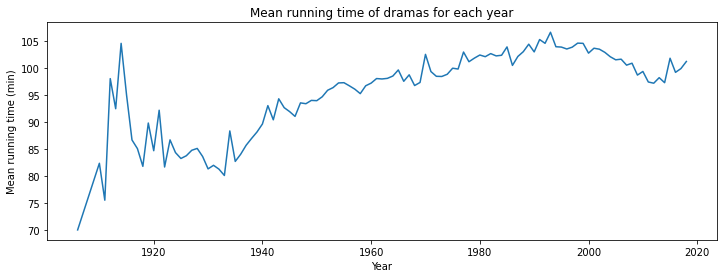

In [ ]:
q5df = pd.read_sql("""
SELECT * FROM dramas""", conn)
q5df = q5df.groupby('year').mean()
q5df['year'] = q5df.index
q5df.reset_index(drop= True, inplace= True)
q5df.sort_values(by=['year'])

plt.figure(figsize=(12,4))
plt.plot(q5df['year'], q5df['time'])
plt.title('Mean running time of dramas for each year')
plt.xlabel('Year')
plt.ylabel('Mean running time (min)')
plt.show();


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 6 


The information above to make the plot (mean running time of the dramas for each year), you will now calculate using a query. 

Your query should return two attributes: year and average time.  

Your solution should be of the form: 
```
pretty_print_sql(<conn>, <query>) 
```

In [ ]:
q6df = pretty_print_sql(conn, """
SELECT year, ROUND(AVG(time),2) AS average_time
FROM dramas
GROUP BY year
ORDER BY year ASC""")

> 
SELECT year, ROUND(AVG(time),2) AS average_time
FROM dramas
GROUP BY year
ORDER BY year ASC


,year,average_time
0,1906,70.00
1,1910,82.33
2,1911,75.50
3,1912,98.00
4,1913,92.43
...,...,...
105,2014,97.25
106,2015,101.77
107,2016,99.16
108,2017,99.86


<!-- END QUESTION -->

## Example 4 -  Examine `names` table

Let's switch gears to consider the `names` table. 

In [ ]:
pd.read_sql('SELECT DISTINCT * FROM names LIMIT 10;', conn)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0059956,tt0054452,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050986,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0038787,tt0036855,tt0034583,tt0038109"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer","tt0034583,tt0040897,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,soundtrack,producer","tt0057877,tt0059749,tt0061184,tt0087803"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0035575,tt0042041,tt0031867,tt0029870"


We can create a DataFrame of selected information and people (using a query `select_actors`).  Only consider actors and actresses, born after 1950, list only their first known movie id. 

In [ ]:
name = 'primaryName'
known = 'knownForTitles'
profession = 'primaryProfession'
born = 'birthYear'

select_actors = f'''
    SELECT DISTINCT {name} AS name, 
           CAST({born} AS int) AS born,
           SUBSTR({known}, 0, INSTR({known}, ',')) AS movie_id,
           CASE WHEN {profession} LIKE '%actor%' THEN 'actor' 
                WHEN {profession} LIKE '%actress%' THEN 'actress'   
                END AS profession
    FROM names
    WHERE {profession} LIKE '%act%' AND
          born > 1950
    '''
pd.read_sql(f'{select_actors} LIMIT 10', conn)

,name,born,movie_id,profession
0,Margaux Hemingway,1954,tt0102122,actress
1,Li Gong,1965,tt0397535,actress
2,Elena Koreneva,1953,tt7529350,actress
3,Brad Pitt,1963,tt0114746,actor
4,Gillian Anderson,1968,tt2294189,actress
5,Pamela Anderson,1967,tt0426592,actress
6,Jennifer Aniston,1969,tt0108778,actress
7,Patricia Arquette,1968,tt1065073,actress
8,Rowan Atkinson,1955,tt0110357,actor
9,Dan Aykroyd,1952,tt0080455,actor


<!-- BEGIN QUESTION -->

## Exercise 7

Create a new table `dramatics` that joins the `select_actors` (from query above) with the `dramas` table by `movie_id` and returns the actor's `name`, `profession`, year `born` as well as their movie they are known for `title` and `year` it was released. 


Consider the `select_actors` query as a subquery.  Take a look at the information here on subqueries and the examples: 
https://www.sqlitetutorial.net/sqlite-subquery/  
https://www.w3resource.com/sqlite/sqlite-subqueries.php

Then, query the new table `dramatics` and return 10 sorted by ascending year born (all attributes).

In [ ]:
select = f'''
SELECT actors.name, actors.profession, actors.born, dramas.title, dramas.year
FROM ({select_actors}) AS actors
INNER JOIN dramas
ON actors.movie_id = dramas.id
'''

conn.executescript(f'''
    DROP TABLE IF EXISTS dramatics;
    CREATE TABLE dramatics AS {select};
    ''');

q7df = pretty_print_sql(conn, '''
SELECT * FROM dramatics
ORDER BY year ASC
LIMIT 10''')

> 
SELECT * FROM dramatics
ORDER BY year ASC
LIMIT 10


,name,profession,born,title,year
0,Adam Ant,actor,1954,Metropolis,1927
1,Harvey M. Guzik,actor,1952,Plymouth Adventure,1952
2,Dominique Vincent,actress,1951,Il prigioniero del re,1954
3,Bridget Duff,actress,1952,Private Hell 36,1954
4,Susie Mathers,actress,1951,This Is My Love,1954
5,Ivana Hoffmann,actress,1995,A Real Woman,1954
6,Columba Powell,actor,1951,Pursuit of the Graf Spee,1956
7,Tito Romalio,actor,1951,Priklyucheniya Artyomki,1956
8,Keith Coyne,actor,1956,Fear Strikes Out,1957
9,Cordelia Monsey,actress,1956,Woman in a Dressing Gown,1957


<!-- END QUESTION -->

## Example 5 - Add new tables 

Note, both the `titles` and `names` tables have fields that contains array of items, e.g., `names`- `knownForTitles`, `names` - `primaryProfession`, `titles` - `genres`, etc. 

We saw in Example 3 and Exercise 5 we can still extract rows that match a certain genre, e.g., "%Drama%".  Or, in Example 4, we can select the first title that an person is known for.  

However, classic relational database design should not contain lists of items in a field.  Therefore, we will expand out these fields to new tables. 

First, we will add a new table `name_to_title` that matches each name id `nconst` with the title id `tconst`.





In [ ]:
cursor = conn.cursor()
cursor.execute("""Select * from names""")
all_data = cursor.fetchall()

In [ ]:
cursor.execute("""CREATE TABLE IF NOT EXISTS name_to_title
                    (nconst TEXT,
                    tconst TEXT)""")

In [ ]:
for single_data in all_data:
    person  = single_data[5].split(",")
    for single_data2 in person:
        cursor.execute("INSERT INTO name_to_title VALUES(:nconst,:tconst)", 
                       { "nconst": single_data[0], "tconst": single_data2 })
conn.commit()

In [ ]:
print_sql(conn, 'SELECT * FROM name_to_title LIMIT 10;')

> SELECT * FROM name_to_title LIMIT 10;
('nm0000001', 'tt0053137')
('nm0000001', 'tt0031983')
('nm0000001', 'tt0050419')
('nm0000001', 'tt0072308')
('nm0000002', 'tt0038355')
('nm0000002', 'tt0071877')
('nm0000002', 'tt0117057')
('nm0000002', 'tt0037382')
('nm0000003', 'tt0059956')
('nm0000003', 'tt0054452')



We can also separate out the list of professions to a separate table `name_to_profession`. 

In [ ]:
cursor = conn.cursor()
cursor.execute("""Select * from names""")
all_data = cursor.fetchall()

In [ ]:
cursor.execute("""CREATE TABLE IF NOT EXISTS name_to_profession
                    (nconst TEXT,
                    profession TEXT)""")

In [ ]:
for single_data in all_data:
    person  = single_data[4].split(",")
    for single_data2 in person:
        cursor.execute("INSERT INTO name_to_profession VALUES(:nconst,:prof)", 
                       { "nconst": single_data[0], "prof": single_data2 })
conn.commit()

In [ ]:
print_sql(conn, 'SELECT * FROM name_to_profession LIMIT 10;')

> SELECT * FROM name_to_profession LIMIT 10;
('nm0000001', 'soundtrack')
('nm0000001', 'actor')
('nm0000001', 'miscellaneous')
('nm0000002', 'actress')
('nm0000002', 'soundtrack')
('nm0000003', 'actress')
('nm0000003', 'soundtrack')
('nm0000003', 'music_department')
('nm0000004', 'actor')
('nm0000004', 'soundtrack')



In [ ]:
# Clean up variables (reduce memory usage)
del all_data

## Example 6 -  Age of Actors in Films 

We are now interested in looking at the age of actors (both actors and actresses) in movies. 

We can start to look at this by first examining the actors and actresses. 



In [ ]:
ex6 = pretty_print_sql(conn, """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
LIMIT 10;
""")

> 
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
LIMIT 10;



,nconst,name,born,profession
0,nm0000001,Fred Astaire,1899,actor
1,nm0000002,Lauren Bacall,1924,actress
2,nm0000003,Brigitte Bardot,1934,actress
3,nm0000004,John Belushi,1949,actor
4,nm0000005,Ingmar Bergman,1918,actor
5,nm0000006,Ingrid Bergman,1915,actress
6,nm0000007,Humphrey Bogart,1899,actor
7,nm0000008,Marlon Brando,1924,actor
8,nm0000009,Richard Burton,1925,actor
9,nm0000010,James Cagney,1899,actor


Next we want to examine the age of actors in different movies.  This means we need to combine the `actor` information with the date of the films.  

We can use a [Common Table Expression](https://www.essentialsql.com/introduction-common-table-expressions-ctes/). 

In [ ]:
ex6b = pretty_print_sql(conn, """
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;
""")

> 
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;



,nconst,name,age,startYear,primaryTitle,profession
0,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
1,nm0000001,Fred Astaire,58,1957,Funny Face,actor
2,nm0000001,Fred Astaire,60,1959,On the Beach,actor
3,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
4,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress
5,nm0000002,Lauren Bacall,22,1946,The Big Sleep,actress
6,nm0000002,Lauren Bacall,50,1974,Murder on the Orient Express,actress
7,nm0000002,Lauren Bacall,72,1996,The Mirror Has Two Faces,actress
8,nm0000003,Brigitte Bardot,22,1956,...And God Created Woman,actress
9,nm0000003,Brigitte Bardot,26,1960,La Vérité,actress


We can use "format strings" to plug into the queries. 

In [ ]:
actors_query = """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
"""

In [ ]:
ex6c = pretty_print_sql(conn, f"""
WITH actors AS ({actors_query})
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;
""")

> 
WITH actors AS (
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
)
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;



,nconst,name,age,startYear,primaryTitle,profession
0,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
1,nm0000001,Fred Astaire,58,1957,Funny Face,actor
2,nm0000001,Fred Astaire,60,1959,On the Beach,actor
3,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
4,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress
5,nm0000002,Lauren Bacall,22,1946,The Big Sleep,actress
6,nm0000002,Lauren Bacall,50,1974,Murder on the Orient Express,actress
7,nm0000002,Lauren Bacall,72,1996,The Mirror Has Two Faces,actress
8,nm0000003,Brigitte Bardot,22,1956,...And God Created Woman,actress
9,nm0000003,Brigitte Bardot,26,1960,La Vérité,actress


<!-- BEGIN QUESTION -->

## Exercise 8 

Let's calculate the average age of an actor (actors and actresses) in a movie (the `startYear` for a movie - when an actor was born `birthYear`), for all actors born after 1900. 

Your answer should be a single entry in a DataFrame.

In [ ]:
actor_query = """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
"""


q8df = pretty_print_sql(conn, f"""
WITH actors AS ({actor_query})
SELECT 
    AVG(t.startYear - a.born) AS average_age
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst AND
    a.born >= 1900;
""")

> 
WITH actors AS (
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
)
SELECT 
    AVG(t.startYear - a.born) AS average_age
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst AND
    a.born >= 1900;



,average_age
0,1672.543193


<!-- END QUESTION -->

Note, you may get a value that doesn't really make sense.  We will try to fix this in the Bonus Question. 

<!-- BEGIN QUESTION -->

## Bonus Question 1

Let's dive into the results. Because these queries can take a while, let's pull this information from Question 8 into a DataFrame, but returning information like `name`, `age`, `title.startYear`, `t.primaryTitle`.  

Use `df = pd.read_sql("query", conn)`

In [ ]:
...
actor_query = """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
"""


df = pd.read_sql(f"""
WITH actors AS ({actor_query})
SELECT 
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst AND 
    a.born >= 1900;
""", conn)

In [ ]:
df.age.mean()

1672.5431925136427

In [ ]:
df.sort_values("age").head()

,name,age,startYear,primaryTitle
1510996,Romy Jean Nyman,-2017,\N,Paradise City
1510997,Piper Nyman,-2017,\N,Paradise City
1925569,Ti Woody Clements,-2016,\N,Baby Blister
6750845,Titus Milo Leon,-2014,\N,Space Opera - The Shade of Human Soul
5735296,Phoenix Lee DuPree,-2014,\N,Sharing


Try to solve issues the "\N" missing values introduce. 

You can through your DataFrame `df` to splot different potential issues. 

Considering only movies with a start year between 1940 and 2020, list all the issues the missing values that must be considered and accounted for. 

* some values of startYear are \N
* some values of born are \N

Rewrite your query to account for these issues and produce a DataFrame that has for each year of film, the profession ('actor' and 'actress'), the average age of profession, and the number ("count") of the profession.

In [ ]:
actor_query = """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
"""

main_query = """
WITH actors AS (
  SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
)
SELECT
    t.startYear,
    a.profession
FROM actors a
LEFT JOIN name_to_title nt ON a.nconst = nt.nconst
INNER JOIN titles t ON nt.tconst = t.tconst
WHERE t.startYear >= 1940 AND t.startYear <= 2020 AND born <> '\\N' AND startYear <> '\\N'
"""

group_query = """
WITH actors AS (
  SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
)
SELECT
    a.profession,
    ROUND(AVG(t.startYear - a.born), 2) AS average_age,
    COUNT(a.profession) AS number_profession
FROM actors a
LEFT JOIN name_to_title nt ON a.nconst = nt.nconst
INNER JOIN titles t ON nt.tconst = t.tconst
WHERE t.startYear >= 1940 AND t.startYear <= 2020 AND born <> '\\N' AND startYear <> '\\N'
GROUP BY profession
"""

df = pd.read_sql(f"""
WITH m AS ({main_query}), g AS ({group_query})
SELECT
    m.startYear,
    m.profession,
    g.average_age,
    g.number_profession
FROM m
LEFT JOIN g
ON m.profession = g.profession;
""", conn)

df.head(20)

,startYear,profession,average_age,number_profession
0,1957,actor,38.05,610702
1,1959,actor,38.05,610702
2,1974,actor,38.05,610702
3,1944,actress,31.86,388079
4,1946,actress,31.86,388079
5,1974,actress,31.86,388079
6,1996,actress,31.86,388079
7,1956,actress,31.86,388079
8,1960,actress,31.86,388079
9,1963,actress,31.86,388079


<!-- END QUESTION -->



In [ ]:
# Close your DB connection 
conn.close()